# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [34]:
import pandas as pd

data = pd.read_json("./05_clean_data.json.zip")

In [35]:
data

,instance,#Variables,#Clauses,iteration_info,baseline_alg,initial_sample_path,initial_sample_size,lower_bound,optimized_sample_size,time_used_by_yasa,timelimit_for_samplns,samplns_used
0,busybox_2020-12-16_21-53-05,1050,996,"[{'nbrhd_tuples': 222, 'nbrhd_confs': 4, 'iter...",YASA(m=1),2023-03-01_13-51-03/38_1_7_5_sample.csv,39,18,23,2.278,897.722,True
1,email,10,17,"[{'nbrhd_tuples': 70, 'nbrhd_confs': 7, 'itera...",YASA(m=1),2023-03-01_13-51-03/3_1_7_5_sample.csv,7,6,6,0.199,899.801,True
2,WaterlooGenerated,580,879,"[{'nbrhd_tuples': 248, 'nbrhd_confs': 36, 'ite...",YASA(m=1),2023-03-01_13-51-03/34_1_7_1_sample.csv,149,82,82,1.438,898.562,True
3,FeatureIDE,19,27,"[{'nbrhd_tuples': 214, 'nbrhd_confs': 8, 'iter...",YASA(m=1),2023-03-01_13-51-03/7_1_7_5_sample.csv,12,7,8,0.207,899.793,True
4,FeatureIDE,19,27,"[{'nbrhd_tuples': 215, 'nbrhd_confs': 9, 'iter...",YASA(m=1),2023-03-01_13-51-03/7_1_7_4_sample.csv,12,7,8,0.208,899.792,True
...,...,...,...,...,...,...,...,...,...,...,...,...
225,Violet,101,203,"[{'nbrhd_tuples': 178, 'nbrhd_confs': 7, 'iter...",YASA(m=1),2023-03-01_13-51-03/19_1_7_1_sample.csv,27,14,17,0.288,899.712,True
226,DMIE,366,627,"[{'nbrhd_tuples': 241, 'nbrhd_confs': 5, 'iter...",YASA(m=1),2023-03-01_13-51-03/30_1_7_5_sample.csv,27,14,17,0.597,899.403,True
227,fiasco_2020-12-01_14-09-14,258,1542,"[{'nbrhd_tuples': 236, 'nbrhd_confs': 19, 'ite...",YASA(m=1),2023-03-01_13-51-03/25_1_7_3_sample.csv,224,196,196,1.152,898.848,True
228,SortingLine,39,77,"[{'nbrhd_tuples': 206, 'nbrhd_confs': 12, 'ite...",YASA(m=1),2023-03-01_13-51-03/14_1_7_3_sample.csv,17,9,9,0.202,899.798,True


We extend the values by the best values we know.

In [36]:
# Find the best values for each instance as reference.
best_solutions = (
    data[["instance", "initial_sample_size", "optimized_sample_size"]]
    .groupby("instance")
    .min()
    .reset_index()
    .rename(
        columns={
            "initial_sample_size": "best_baseline",
            "optimized_sample_size": "best_lns_ub",
        }
    )
)
best_lb = (
    data[["instance", "lower_bound"]]
    .groupby("instance")
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lb"})
)
best_values = best_solutions.merge(best_lb, left_on="instance", right_on="instance")
best_values

,instance,best_baseline,best_lns_ub,best_lb
0,APL,10,7,7
1,APL-Model,15,8,7
2,BankingSoftware,43,29,28
3,BattleofTanks,454,340,256
4,ChatClient,8,7,7
5,DMIE,27,16,16
6,E-Shop,22,12,8
7,EMBToolkit,1883,1877,1851
8,FameDB,8,8,8
9,FeatureIDE,12,8,7


In [37]:
# add them to the data as reference
data = data.merge(best_values, left_on="instance", right_on="instance")

In [38]:
# instances that have been solved by all algorithms
instances_intersection = None
for instances in data.groupby(["baseline_alg"])["instance"].unique().to_list():
    if instances_intersection is None:
        instances_intersection = set(instances)
    else:
        instances_intersection &= set(instances)
len(instances_intersection)

46

In [39]:
t = (
    data.groupby(["instance", "baseline_alg"])[
        ["initial_sample_size", "best_lb", "optimized_sample_size"]
    ]
    .mean()
    .reset_index()
)
# t = t[t["instance"].isin(instances_intersection)]
t["sort_key"] = t.apply(
    (
        lambda row: (
            row["baseline_alg"].split("(")[0][::-1],
            len(row["baseline_alg"]),
            row["baseline_alg"],
        )
    ),
    axis=1,
)
t["ub_1"] = 100 * (t["initial_sample_size"] / t["best_lb"] - 1)
t["ub_2"] = 100 * (t["optimized_sample_size"] / t["best_lb"] - 1)
t1 = t.copy()
t1.rename(columns={"ub_1": "ub"}, inplace=True)
t1["SampLNS"] = "Without SampLNS"
t2 = t.copy()
t2.rename(columns={"ub_2": "ub"}, inplace=True)
t2["SampLNS"] = "With SampLNS"
t1.sort_values(by="sort_key", inplace=True)
t2.sort_values(by="sort_key", inplace=True)
t = pd.concat([t1, t2], ignore_index=True).drop(
    columns=["ub_1", "ub_2", "initial_sample_size"]
)
t = t[~t["baseline_alg"].str.contains("FIDE-YASA")]
t["baseline_alg"] = t["baseline_alg"].apply(lambda s: s.split("-")[-1])

In [40]:
t

,instance,baseline_alg,best_lb,optimized_sample_size,sort_key,ub,SampLNS
0,APL,YASA(m=1),7.0,7.0,"(ASAY, 9, YASA(m=1))",42.857143,Without SampLNS
1,busybox-1_29_2,YASA(m=1),18.0,24.6,"(ASAY, 9, YASA(m=1))",144.444444,Without SampLNS
2,busybox_2007-01-24_09-14-09,YASA(m=1),21.0,22.0,"(ASAY, 9, YASA(m=1))",85.714286,Without SampLNS
3,busybox_2020-12-16_21-53-05,YASA(m=1),18.0,23.4,"(ASAY, 9, YASA(m=1))",116.666667,Without SampLNS
4,calculate,YASA(m=1),5.0,5.0,"(ASAY, 9, YASA(m=1))",100.000000,Without SampLNS
...,...,...,...,...,...,...,...
87,aaed2000,YASA(m=1),51.0,67.4,"(ASAY, 9, YASA(m=1))",32.156863,With SampLNS
88,am31_sim,YASA(m=1),28.0,41.0,"(ASAY, 9, YASA(m=1))",46.428571,With SampLNS
89,atlas_mips32_4kc,YASA(m=1),31.0,44.6,"(ASAY, 9, YASA(m=1))",43.870968,With SampLNS
90,PPU,YASA(m=1),12.0,12.0,"(ASAY, 9, YASA(m=1))",0.000000,With SampLNS


In [41]:
# Prepare plotting
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

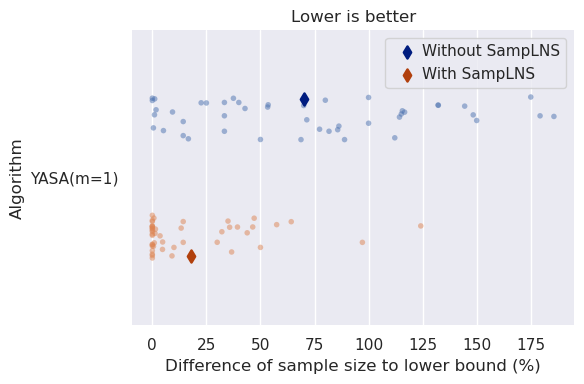

In [42]:
f, ax = plt.subplots(figsize=(6, 4))
sns.despine(bottom=True, left=True)
sns.stripplot(
    data=t,
    y="baseline_alg",
    x="ub",
    hue="SampLNS",
    dodge=True,
    alpha=0.5,
    zorder=1,
    legend=False,
    size=4,
    jitter=0.15,
)
sns.pointplot(
    data=t[t["instance"].isin(instances_intersection)],
    x="ub",
    y="baseline_alg",
    hue="SampLNS",
    join=False,
    dodge=0.8 - 0.8 / 3,
    palette="dark",
    markers="d",
    scale=0.9,
    errorbar=None,
)
sns.move_legend(
    ax,
    loc="upper right",
    ncol=1,
    frameon=True,
    columnspacing=1,
    handletextpad=0,
    title=None,
)
plt.title("Lower is better")
plt.xlabel("Difference of sample size to lower bound (%)")
plt.ylabel("Algorithm")
plt.tight_layout()
plt.savefig("./plots/01_11_how_much_above_lb_stripplot.pdf")
plt.show()

In [43]:
t[t["instance"].isin(instances_intersection)].groupby(["baseline_alg", "SampLNS"])[
    ["ub"]
].mean()

ub
baseline_alg SampLNS                   
YASA(m=1)    With SampLNS     17.788461
             Without SampLNS  70.001956

In [44]:
t_ = (
    t[t["instance"].isin(instances_intersection)]
    .groupby(["instance", "baseline_alg", "SampLNS"])[["ub"]]
    .mean()
)
t_["c"] = t_["ub"] == 0.0
t_.reset_index().groupby(["baseline_alg", "SampLNS"])[["c"]].sum()

c
baseline_alg SampLNS            
YASA(m=1)    With SampLNS     19
             Without SampLNS   2

In [45]:
t_ = (
    t[t["instance"].isin(instances_intersection)]
    .groupby(["instance", "baseline_alg", "SampLNS"])[["ub"]]
    .mean()
)
t_["c"] = t_["ub"] <= 20.0
t_.reset_index().groupby(["baseline_alg", "SampLNS"])[["c"]].sum()

c
baseline_alg SampLNS            
YASA(m=1)    With SampLNS     32
             Without SampLNS  11